In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Prepare dataset and load dataFrame using pandas.
data = {'Height (cm)': [158, 158, 158, 160, 160, 163, 163, 160, 163, 165, 165, 165, 168, 168, 168, 170, 170, 170],
        'Weight (kg)': [58, 59, 63, 59, 60, 60, 61, 64, 64, 61, 62, 65, 62, 63, 66, 63, 64, 68],
        'T Shirt Size': ['M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']}

dataset = pd.DataFrame(data)
#print(dataset.info()) #rows = 18, columns 3
print(dataset.head(18))

    Height (cm)  Weight (kg) T Shirt Size
0           158           58            M
1           158           59            M
2           158           63            M
3           160           59            M
4           160           60            M
5           163           60            M
6           163           61            M
7           160           64            L
8           163           64            L
9           165           61            L
10          165           62            L
11          165           65            L
12          168           62            L
13          168           63            L
14          168           66            L
15          170           63            L
16          170           64            L
17          170           68            L


In [28]:
#Height, Weight values must have normalization to synchronize.
normalization_df = (dataset.iloc[:,0:2] - dataset.iloc[:,0:2].mean() )/dataset.iloc[:,0:2].std()

df = pd.concat([normalization_df,dataset.iloc[:,-1]], axis = 1)
print(df.head(18))

    Height (cm)  Weight (kg) T Shirt Size
0     -1.387274    -1.644771            M
1     -1.387274    -1.265209            M
2     -1.387274     0.253042            M
3     -0.924849    -1.265209            M
4     -0.924849    -0.885646            M
5     -0.231212    -0.885646            M
6     -0.231212    -0.506084            M
7     -0.924849     0.632604            L
8     -0.231212     0.632604            L
9      0.231212    -0.506084            L
10     0.231212    -0.126521            L
11     0.231212     1.012167            L
12     0.924849    -0.126521            L
13     0.924849     0.253042            L
14     0.924849     1.391730            L
15     1.387274     0.253042            L
16     1.387274     0.632604            L
17     1.387274     2.150855            L


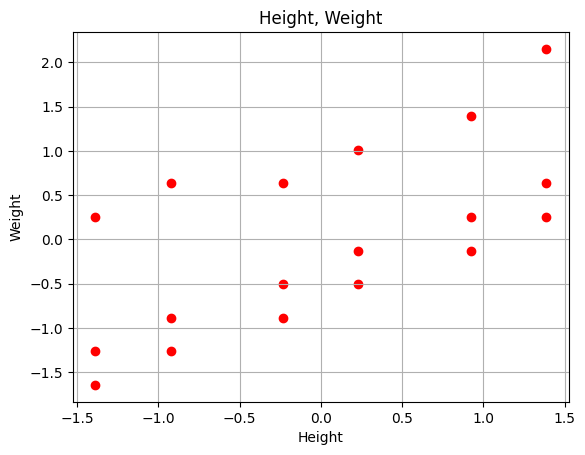

In [36]:
#Graph Height, Weight
plt.title("Height, Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid()

plt.scatter(df.iloc[:,0],df.iloc[:,1], color='red')
plt.show() 

In [50]:
#define function Euclidean distance
def Euclidean(x1,y1,x2,y2):
    return(np.sqrt((x1-x2)**2 + (y1-y2)**2))

In [64]:
def Knn(new_customer, k):
    new_h, new_w = new_customer.values()

    #normalize new height, weight data
    height = (new_h - dataset.iloc[:,0].mean())/dataset.iloc[:,0].std()
    weight = (new_w - dataset.iloc[:,1].mean())/dataset.iloc[:,1].std()

    #plt show
    plt.title("Height, Weight")
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.grid()
    plt.scatter(df.iloc[:,0],df.iloc[:,1], color='red', label = 'Original')
    plt.scatter(height,weight, color = 'blue', label = "new_customer")
    plt.legend()
    plt.show()

    #Find distance all samples Euclidean distance formula and convert to dataframe.
    distance = []
    for i in range (len(df)):
        dist = Euclidean(df.iloc[i,0],df.iloc[i,1], height,weight)
        distance.append([dist, df.iloc[i,2]])
    
    #Find group Using K hyperparameter.
    group = pd.DataFrame(distance, columns = ["distance", "T Shirt Size"])
    group.sort_values(by='distance', inplace=True)

    k_nearest = group.head(k)
    # Find the most frequent T Shirt Size among k nearest neighbors
    result = k_nearest["T Shirt Size"].mode().values[0]

    return result
    

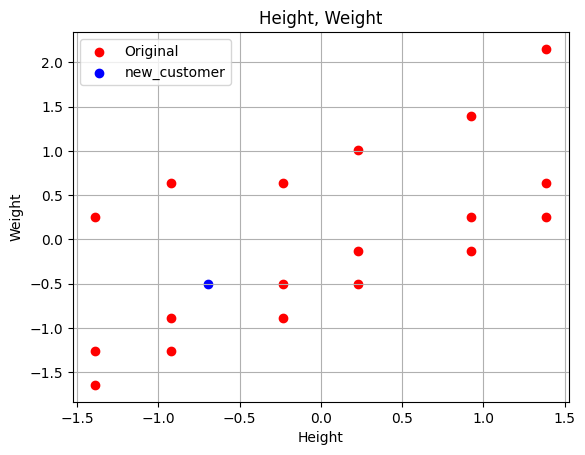

new customer size is :  M


In [65]:
#predict new customer
new_customer = {'Height (cm)': 161,'Weight (kg)': 61}
result = Knn(new_customer,3)

print("new customer size is : ", result)